Output()

[PosixPath('../runs/random/Sigmoid/2D3M_train/full/2/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/8/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/10/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/7/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/5/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/6/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/9/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/4/logs/eval/sigmoid_2D3M_train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/random/Sigmoid/2D3M_train/full/3/logs/eval/

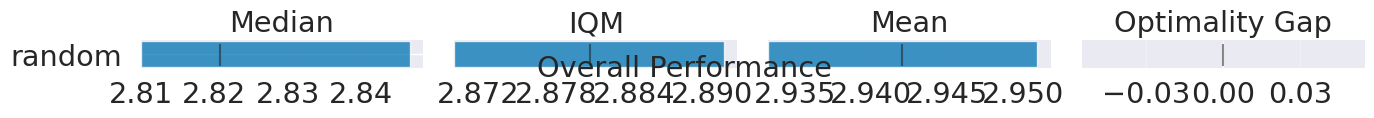

In [4]:
from pathlib import Path
from instance_dac.utils.data_loading import load_performance_data
import pandas as pd
import numpy as np
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils


path = Path("../runs/random/Sigmoid/2D3M_train/full/")

data = load_performance_data(path, search_prefix="/eval/**/")
data["origin"] = "random"

perf = pd.DataFrame(data.groupby(["origin", "seed", "instance"])["overall_performance"].mean())
perf_dict = {}
for gid, gdf in perf.groupby("origin"):
    gdf = gdf.reset_index()
    P = gdf["overall_performance"].to_numpy()
    P = P.reshape((gdf["seed"].nunique(), gdf["instance"].nunique()))
    perf_dict[gid] = P




algorithms = list(perf_dict.keys())
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`.
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  perf_dict, aggregate_func, reps=5000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithms, xlabel='Overall Performance')